In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from dateutil.parser import parse

In [131]:
file_path = input('Data File Path: ')
sheet_name = input('Sheet Name: ')

Data File Path: C:\Users\rayde\Downloads\aapl_options.xlsx
Sheet Name: Sheet1


In [246]:
aapl_data = pd.read_excel(file_path, sheet_name)
aapl_data = pd.DataFrame(aapl_data)
aapl_data.dtypes

Date                  datetime64[ns]
Stock                         object
Type                          object
Expiration            datetime64[ns]
Strike Price                   int64
Bid Price                    float64
Ask Price                    float64
Implied Volatility           float64
Vega                         float64
Ratio beta/vega              float64
Difference in B/V            float64
Change in B/V diff           float64
dtype: object

In [269]:
days_left = aapl_data['Expiration'] - aapl_data['Date']
aapl_data['Days Left'] = days_left.astype('timedelta64[D]')
aapl_data.dtypes

Date                  datetime64[ns]
Stock                         object
Type                          object
Expiration            datetime64[ns]
Strike Price                   int64
Bid Price                    float64
Ask Price                    float64
Implied Volatility           float64
Vega                         float64
Ratio beta/vega              float64
Difference in B/V            float64
Change in B/V diff           float64
Days Left                    float64
dtype: object

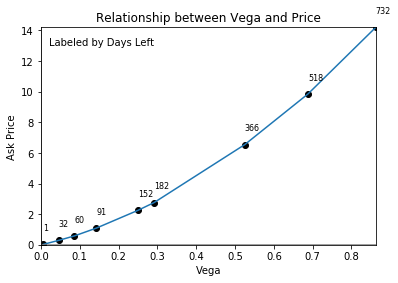

In [462]:
x = aapl_data['Vega']
y = aapl_data['Ask Price']
label = aapl_data['Days Left']

plt.figure()
plt.plot(x, y)

# Label Axes 
plt.xlim(0, x.max())
plt.ylim(0, y.max())

# Draw Axis Lines
plt.axvline(x=0, color = 'Grey')
plt.axhline(y=0, color = 'Grey')

# Title Graph
plt.title("Relationship between Vega and Price")
plt.xlabel('Vega')
plt.ylabel('Ask Price')

plt.scatter(x, y, c = "Black")
plt.text(.02,13, "Labeled by Days Left", color = "Black")

for i, days in enumerate(label):
    plt.text(x[i], y[i] + .9, int(days), fontsize= 8)

plt.show()
plt.close()

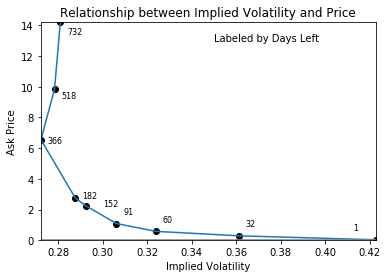

In [511]:
x = aapl_data['Implied Volatility']
y = aapl_data['Ask Price']
label = aapl_data['Days Left']

plt.figure()
plt.plot(x, y)

# Label Axes 
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

# Draw Axis Lines
plt.axvline(x=0, color = 'Grey')
plt.axhline(y=0, color = 'Grey')

# Title Graph
plt.title("Relationship between Implied Volatility and Price")
plt.xlabel('Implied Volatility')
plt.ylabel('Ask Price')

plt.scatter(x, y, c = "Black")
plt.text(.35, 13, "Labeled by Days Left", color = "Black")

plt.text(x[0]+.003, y[0] - .8, int(days_left[0]), fontsize= 8)
plt.text(x[1]+.003, y[1] - .6, int(days_left[1]), fontsize= 8)
plt.text(x[2]+.003, y[2] - .25, int(days_left[2]), fontsize= 8)
plt.text(x[3]+.003, y[3], int(days_left[3]), fontsize= 8)
plt.text(x[4]+.008, y[4], int(days_left[4]), fontsize= 8)
plt.text(x[5]+.003, y[5]+.6, int(days_left[5]), fontsize= 8)
plt.text(x[6]+.003, y[6]+.6, int(days_left[6]), fontsize= 8)
plt.text(x[7]+.003, y[7]+.6, int(days_left[7]), fontsize= 8)
plt.text(x[8]-.01, y[8]+.6, int(days_left[8]), fontsize= 8)

plt.show()
plt.close()